# Neural Networks with Keras
## Part 2: model creation

Practicing creating neural network nodels, with Keras:
* Regression
* Binary classification
* Multi-class classification

@Ricardo Almeida

### Paramenters per task

[**Activation Funtions**](https://keras.io/api/layers/activations/) (parameter "activation") 
- sigmoid
- softmax
- linear

[**Loss Funtions**](https://keras.io/api/losses/) (parameter "loss") 
- binary_crossentropy
- mean_squared_error
- sparse_categorical_crossentropy

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [2]:
from keras.layers import Dense, Input
from keras.models import Sequential

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_california_housing, load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [3]:
RANDOM_SEED = 7657

TEST_SIZE=0.20

In [4]:
def plot_history(train_hist):
    pd.DataFrame(train_hist).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

## California Housing dataset

#### Loading dataset

In [5]:
dataset = fetch_california_housing()

In [6]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
dataset.target_names

['MedHouseVal']

In [9]:
dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [10]:
# Standardize the features
data_scaled = StandardScaler().fit_transform(dataset.data)
#data_scaled = dataset.data

In [11]:
X_train, X_dev, y_train, y_dev = train_test_split(
    data_scaled, dataset.target, random_state=RANDOM_SEED, test_size=TEST_SIZE)

#### Model creation / fitting

Create Keras model

In [12]:
### Create a Neural Network model, with Keras, to fit the given data. Use 3 hidden layers.
### Your code here:

model = Sequential([
    Input((8,)),
    Dense(8, activation="relu"),
    Dense(12, activation="relu"),
    Dense(12, activation="relu"),
    Dense(1, activation="...")
])

Compile the Keras model

In [13]:
### Decide on the most appropriate loss function; pick an optimizer.
### Your code here:

model.compile(loss="...", optimizer="adam")

Fit the model

In [14]:
### Train the model, limiting to 20 epochs; try a batch size of 16
### Your code here:

trained = model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=15, batch_size=16)

Epoch 1/15
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step - loss: 1.9013 - val_loss: 0.5382
Epoch 2/15
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.4801 - val_loss: 0.4384
Epoch 3/15
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.4200 - val_loss: 0.4177
Epoch 4/15
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.4013 - val_loss: 0.4018
Epoch 5/15
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.3833 - val_loss: 0.3964
Epoch 6/15
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.3766 - val_loss: 0.3828
Epoch 7/15
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 0.3437 - val_loss: 0.3766
Epoch 8/15
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.3358 - val_loss: 0.3673
Epoch 9/15
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.3365 - val_loss: 0.3610
Epoch 10/15
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.3311 - val_loss: 0.3577
Epoch 11/15
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.3409 - val_loss: 0.3534
Epoch 12

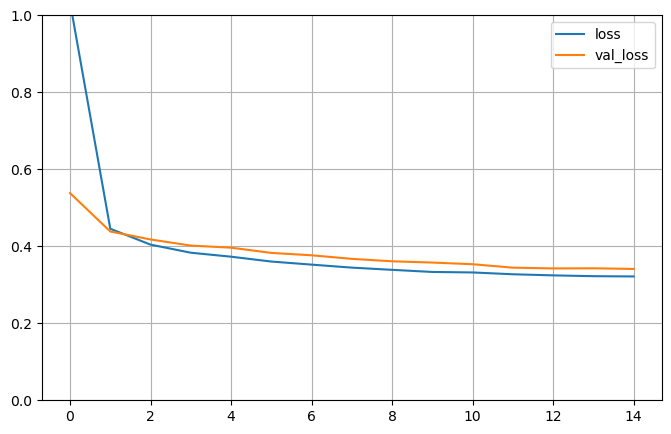

In [15]:
plot_history(trained.history)

## Breast cancer wisconsin (diagnostic) dataset

#### Loading dataset

In [16]:
dataset = load_breast_cancer()

In [17]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [18]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [19]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [20]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [21]:
# Standardize the features
data_scaled = StandardScaler().fit_transform(dataset.data)
#data_scaled = dataset.data

In [22]:
X_train, X_dev, y_train, y_dev = train_test_split(
    data_scaled, dataset.target, random_state=RANDOM_SEED, test_size=TEST_SIZE)

#### Model creation / fitting

Create Keras model

In [23]:
### Create a model with 2 hidden layers.
### Your code here:

model = Sequential([
    Input((30,)),
    Dense(8, activation="relu"),
    Dense(12, activation="relu"),
    Dense(1, activation="...")
    ])

Compile the Keras model

In [ ]:
### Also allow checking the model's accuracy during the training process
### Your code here:

model.compile(loss="...", optimizer="adam", metrics=['accuracy'])

Fit the model

In [25]:
### Your code here:

trained = model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=15, batch_size=16)

Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7312 - loss: 0.6361 - val_accuracy: 0.7807 - val_loss: 0.5516
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.8623 - loss: 0.5001 - val_accuracy: 0.8596 - val_loss: 0.4346
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.8961 - loss: 0.3773 - val_accuracy: 0.8772 - val_loss: 0.3406
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.9361 - loss: 0.2818 - val_accuracy: 0.8860 - val_loss: 0.2751
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.9359 - loss: 0.2322 - val_accuracy: 0.9298 - val_loss: 0.2306
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.9405 - loss: 0.2022 - val_accuracy: 0.9474 - val_loss: 0.1967
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.9592 - loss: 0.1606 - val_accuracy: 0.9474 - val_loss: 0.1682
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.9506 - loss: 0.1646 - val_accuracy: 0.94

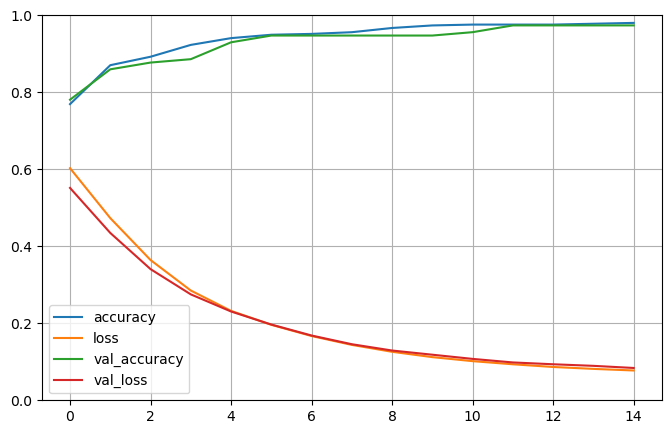

In [26]:
plot_history(trained.history)

In [ ]:
### What is the diagnostic for the first observation in the Dev set?
### Your code here:

model.predict(X_dev[[0]])

In [ ]:
### Is the diagnostic correct? Compare with the actual value
### Your code here:

y_dev[0]

## Wine recognition dataset

#### Loading dataset

In [29]:
dataset = load_wine()

In [30]:
print(dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [31]:
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [32]:
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [33]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [34]:
# Standardize the features
data_scaled = StandardScaler().fit_transform(dataset.data)
#data_scaled = dataset.data

In [35]:
X_train, X_dev, y_train, y_dev = train_test_split(
    data_scaled, dataset.target, random_state=RANDOM_SEED, test_size=TEST_SIZE)

#### Model creation / fitting

Create Keras model

In [36]:
### Create a model with 2 hidden layers.
### Your code here:

model = Sequential([
    Input((13,)),
    Dense(8, activation="relu"),
    Dense(12, activation="relu"),
    Dense(3, activation="...")
])

Compile the Keras model

In [37]:
### Your code here:
### Also allow checking the model's accuracy during the training process

model.compile(loss="...", optimizer="adam", metrics=['accuracy'])

Fit the model

In [38]:
### Your code here:

trained = model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=25, batch_size=16)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4119 - loss: 1.0944 - val_accuracy: 0.3611 - val_loss: 1.0655
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4265 - loss: 0.9915 - val_accuracy: 0.3611 - val_loss: 0.9946
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4609 - loss: 0.9393 - val_accuracy: 0.5000 - val_loss: 0.9309
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5222 - loss: 0.8553 - val_accuracy: 0.6111 - val_loss: 0.8718
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5439 - loss: 0.8773 - val_accuracy: 0.6111 - val_loss: 0.8146
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5625 - loss: 0.8293 - val_accuracy: 0.6944 - val_loss: 0.7587
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7796 - loss: 0.7364 - val_accuracy: 0.7222 - val_loss: 0.7064
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7396 - loss: 0.7183 - val_accuracy: 0.8056 - val_loss: 0.6566
Epoch 9/

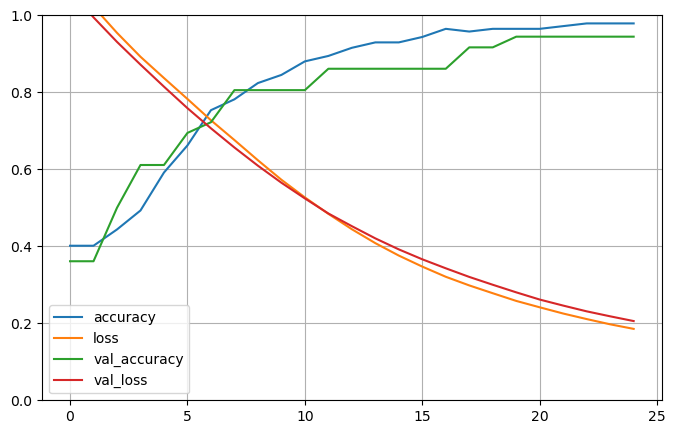

In [39]:
plot_history(trained.history)

In [ ]:
### What is the predicted class (cultivator) for the first wine in the Dev set?
### Your code here:

model.predict(X_dev[[1]])

In [ ]:
### Is the classification correct? Compare with the actual value
### Your code here:

y_dev[1]